In [ ]:
# evaluate residuals after doing linear regression

Xreg = onp.hstack((X[:,:index],X[:,index+1:]))
Yreg = X[:,index]
beta = onp.linalg.solve(onp.dot(Xreg.T, Xreg), onp.dot(Xreg.T, Yreg))
res  = Yreg - onp.dot(Xreg, beta)
gam  = onp.sqrt(onp.sum(res**2)/Xreg.shape[0])
print(gam)

0.14069186413447057


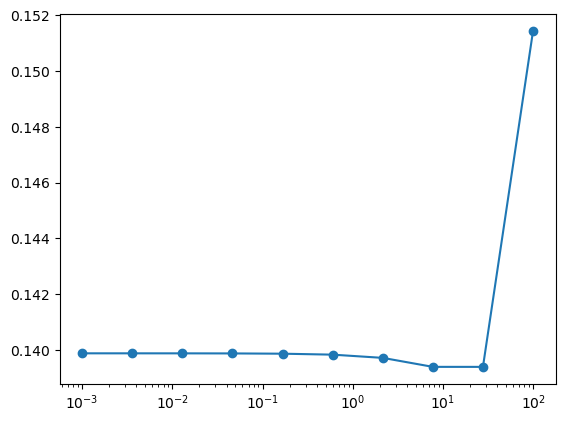

In [ ]:
# do cross-validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Xreg, Yreg, test_size=0.4, random_state=0)

test_err = onp.zeros((len(gamma_vect),))
for (j,gamma) in enumerate(gamma_vect):
    beta = onp.linalg.solve(onp.dot(X_train.T, X_train) + gamma*onp.eye(X_train.shape[1]), onp.dot(X_train.T, y_train))
    res  = y_test - onp.dot(X_test, beta)
    test_err[j] = onp.sqrt(onp.sum(res**2)/X_test.shape[0])

plt.semilogx(gamma_vect, test_err, '-o')

In [ ]:
possible_edges=nx.DiGraph()
for index,gene in enumerate(node_names):
    for causing_gene in node_names[:index]:
        possible_edges.add_edge(causing_gene,gene)